#	Gradient Descent

# CONVEX OPTIMIZATION FOR MACHINE LEARNING

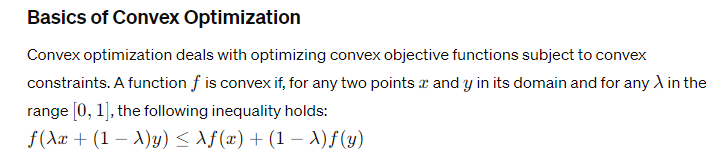

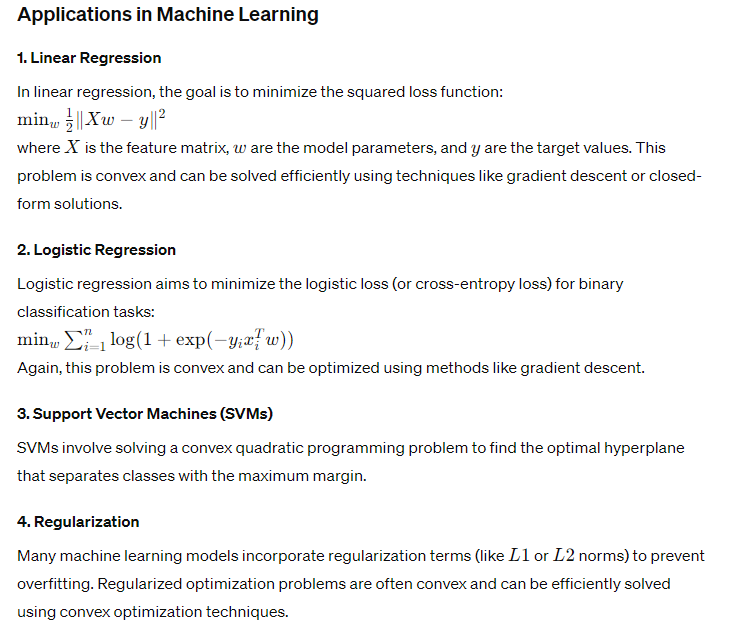

In [ ]:
import numpy as np
import cvxpy as cp

# Generate some synthetic data for linear regression
np.random.seed(0)
n = 100  # Number of data points
d = 2    # Number of features

# Generate random feature matrix X and true coefficients w_true
X = np.random.randn(n, d)
w_true = np.random.randn(d)

# Generate target values y with noise
y = X.dot(w_true) + 0.1 * np.random.randn(n)

# Define the optimization variables
w = cp.Variable(d)

# Define the objective (least squares loss)
loss = cp.sum_squares(X @ w - y)

# Define the problem
problem = cp.Problem(cp.Minimize(loss))

# Solve the problem
problem.solve()

# Get the optimal value of w
w_opt = w.value

# Print the true coefficients and the optimized coefficients
print("True Coefficients:", w_true)
print("Optimal Coefficients:", w_opt)

True Coefficients: [-0.36918184 -0.23937918]
Optimal Coefficients: [-0.38705149 -0.23965388]


#Linear Regression

In [ ]:
import numpy as np

def linear_regression_closed_form(X, y):
    # Add bias term to feature matrix
    X_b = np.c_[np.ones((X.shape[0], 1)), X]  # Add a column of ones for bias

    # Compute optimal parameters using the normal equation
    w_opt = np.linalg.inv(X_b.T @ X_b) @ X_b.T @ y

    return w_opt

# Example usage:
# Generate synthetic data
np.random.seed(0)
n = 100
d = 2
X = np.random.randn(n, d)
w_true = np.array([2, -3])
y = X.dot(w_true) + 0.1 * np.random.randn(n)

# Solve linear regression using closed-form solution
w_opt = linear_regression_closed_form(X, y)
print("Optimal Coefficients (Closed-Form):", w_opt)

Optimal Coefficients (Closed-Form): [-0.00514111  2.01104649 -3.00540371]


#Logistic Regression


In [ ]:
import numpy as np

def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def logistic_regression_gradient_descent(X, y, learning_rate=0.1, num_epochs=1000):
    # Add bias term to feature matrix
    X_b = np.c_[np.ones((X.shape[0], 1)), X]  # Add a column of ones for bias

    # Initialize weights
    w = np.zeros(X_b.shape[1])

    # Gradient descent loop
    for _ in range(num_epochs):
        z = X_b.dot(w)
        y_pred = sigmoid(z)
        gradient = X_b.T.dot(y_pred - y) / len(y)
        w -= learning_rate * gradient

    return w

# Example usage:
# Generate synthetic data for binary classification
np.random.seed(0)
n = 100
d = 2
X = np.random.randn(n, d)
w_true = np.array([1, -1])
y = (X.dot(w_true) + 0.5 * np.random.randn(n)) > 0

# Convert y to binary labels (0 or 1)
y = y.astype(int)

# Solve logistic regression using gradient descent
w_opt = logistic_regression_gradient_descent(X, y)
print("Optimal Coefficients (Logistic Regression):", w_opt)

Optimal Coefficients (Logistic Regression): [-0.26940703  2.94068039 -3.15794301]


#Support Vector Machines (SVMs)


In [ ]:
from sklearn.svm import SVC
import numpy as np

# Example usage:
# Generate synthetic data for binary classification
np.random.seed(0)
n = 100
d = 2
X = np.random.randn(n, d)
w_true = np.array([1, -1])
y = (X.dot(w_true) + 0.5 * np.random.randn(n)) > 0

# Create SVM classifier with linear kernel
svm = SVC(kernel='linear')
svm.fit(X, y)

# Get the optimal hyperplane parameters
w_opt = svm.coef_[0]
b_opt = svm.intercept_[0]
print("Optimal Coefficients (SVM):", w_opt)
print("Optimal Intercept (SVM):", b_opt)

Optimal Coefficients (SVM): [ 1.85559846 -1.98327831]
Optimal Intercept (SVM): -0.31073324634603106


#Regularization

In [ ]:
from sklearn.linear_model import LogisticRegression
import numpy as np

# Example usage:
# Generate synthetic data for binary classification
np.random.seed(0)
n = 100
d = 2
X = np.random.randn(n, d)
w_true = np.array([1, -1])
y = (X.dot(w_true) + 0.5 * np.random.randn(n)) > 0

# Convert y to binary labels (0 or 1)
y = y.astype(int)

# Create Logistic Regression model with L1 regularization
logreg_l1 = LogisticRegression(penalty='l1', solver='liblinear')
logreg_l1.fit(X, y)
w_opt_l1 = logreg_l1.coef_[0]
print("Optimal Coefficients (Logistic Regression with L1):", w_opt_l1)

# Create Logistic Regression model with L2 regularization
logreg_l2 = LogisticRegression(penalty='l2', solver='liblinear')
logreg_l2.fit(X, y)
w_opt_l2 = logreg_l2.coef_[0]
print("Optimal Coefficients (Logistic Regression with L2):", w_opt_l2)

Optimal Coefficients (Logistic Regression with L1): [ 2.75303315 -2.9827218 ]
Optimal Coefficients (Logistic Regression with L2): [ 2.1464886  -2.30206597]


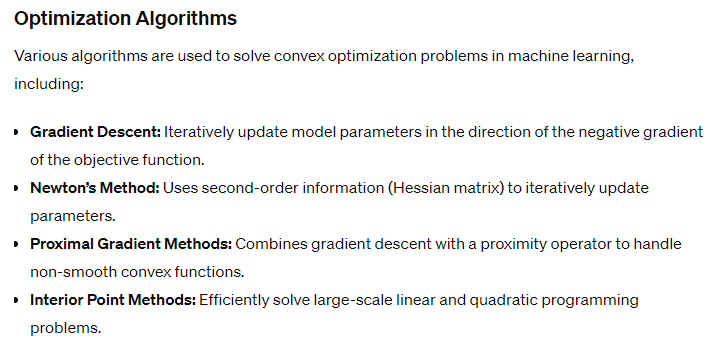

#Gradient Descent
Gradient descent is a first-order optimization algorithm that updates model parameters in the direction of the negative gradient of the objective function.

In [ ]:
import numpy as np

def gradient_descent(X, y, initial_w, learning_rate=0.01, num_epochs=100):
    w = initial_w

    for epoch in range(num_epochs):
        # Compute predictions and gradient
        y_pred = X.dot(w)
        gradient = X.T.dot(y_pred - y) / len(y)

        # Update weights
        w -= learning_rate * gradient

    return w

# Example usage:
# X: feature matrix (n_samples, n_features)
# y: target vector (n_samples,)
# initial_w: initial weights (n_features,)
# learning_rate: learning rate for gradient descent
# num_epochs: number of iterations
np.random.seed(0)
n = 100
d = 2
X = np.random.randn(n, d)
w_true = np.array([2, -3])
y = X.dot(w_true) + 0.1 * np.random.randn(n)
initial_w = np.zeros(d)

# Perform gradient descent
w_opt = gradient_descent(X, y, initial_w, learning_rate=0.1, num_epochs=1000)
print("Optimal Coefficients (Gradient Descent):", w_opt)

Optimal Coefficients (Gradient Descent): [ 2.01103446 -3.00610158]


#Newton's Method
Newton's method utilizes second-order information (Hessian matrix) to iteratively update parameters.

In [ ]:
import numpy as np

def newtons_method(X, y, initial_w, num_epochs=10):
    w = initial_w

    for epoch in range(num_epochs):
        # Compute predictions, gradient, and Hessian
        y_pred = X.dot(w)
        gradient = X.T.dot(y_pred - y) / len(y)
        hessian = X.T.dot(X) / len(y)

        # Update weights using Newton's method
        w -= np.linalg.inv(hessian).dot(gradient)

    return w

# Example usage:
# X: feature matrix (n_samples, n_features)
# y: target vector (n_samples,)
# initial_w: initial weights (n_features,)
np.random.seed(0)
n = 100
d = 2
X = np.random.randn(n, d)
w_true = np.array([2, -3])
y = X.dot(w_true) + 0.1 * np.random.randn(n)
initial_w = np.zeros(d)

# Perform Newton's method
w_opt = newtons_method(X, y, initial_w, num_epochs=10)
print("Optimal Coefficients (Newton's Method):", w_opt)

Optimal Coefficients (Newton's Method): [ 2.01103446 -3.00610158]


#Proximal Gradient Methods
Proximal gradient methods combine gradient descent with a proximity operator to handle non-smooth convex functions (e.g., 𝐿1 regularization).

In [ ]:
import numpy as np

def soft_thresholding_operator(v, t):
    return np.sign(v) * np.maximum(np.abs(v) - t, 0)

def proximal_gradient_method(X, y, initial_w, reg_param=0.1, learning_rate=0.01, num_epochs=100):
    w = initial_w

    for epoch in range(num_epochs):
        # Compute predictions and gradient
        y_pred = X.dot(w)
        gradient = X.T.dot(y_pred - y) / len(y)

        # Update weights with proximal operator (soft thresholding for L1 regularization)
        w = soft_thresholding_operator(w - learning_rate * gradient, reg_param * learning_rate)

    return w

# Example usage:
# X: feature matrix (n_samples, n_features)
# y: target vector (n_samples,)
# initial_w: initial weights (n_features,)
# reg_param: regularization parameter (for L1 regularization)
# learning_rate: learning rate for gradient descent
# num_epochs: number of iterations
np.random.seed(0)
n = 100
d = 2
X = np.random.randn(n, d)
w_true = np.array([2, -3])
y = X.dot(w_true) + 0.1 * np.random.randn(n)
initial_w = np.zeros(d)

# Perform proximal gradient method (e.g., for L1 regularization)
reg_param = 0.1
learning_rate = 0.1
num_epochs = 1000
w_opt = proximal_gradient_method(X, y, initial_w, reg_param=reg_param, learning_rate=learning_rate, num_epochs=num_epochs)
print("Optimal Coefficients (Proximal Gradient Method):", w_opt)

Optimal Coefficients (Proximal Gradient Method): [ 1.91751219 -2.91329563]


#Interior Point Methods
Interior point methods efficiently solve large-scale linear and quadratic programming problems.

In [ ]:
import cvxpy as cp
import numpy as np

def interior_point_method(X, y):
    # X: feature matrix (n_samples, n_features)
    # y: target vector (n_samples,)

    # Define optimization variables
    w = cp.Variable(X.shape[1])

    # Define objective function (e.g., least squares)
    objective = cp.Minimize(cp.sum_squares(X @ w - y))

    # Define constraints (if any)
    constraints = []

    # Define optimization problem
    problem = cp.Problem(objective, constraints)

    # Solve the problem using an interior point method
    problem.solve()

    # Get the optimal solution
    w_opt = w.value

    return w_opt

# Example usage:
# X: feature matrix (n_samples, n_features)
# y: target vector (n_samples,)
np.random.seed(0)
n = 100
d = 2
X = np.random.randn(n, d)
w_true = np.array([2, -3])
y = X.dot(w_true) + 0.1 * np.random.randn(n)

# Perform interior point method (e.g., for least squares)
w_opt = interior_point_method(X, y)
print("Optimal Coefficients (Interior Point Method):", w_opt)

Optimal Coefficients (Interior Point Method): [ 2.01103446 -3.00610158]


#Convex Problems

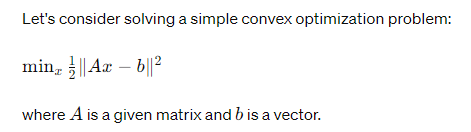

In [ ]:
import cvxpy as cp
import numpy as np

# Define the dimensions
n = 10  # Number of variables
m = 5   # Number of constraints

# Generate random data for the problem
np.random.seed(0)
A = np.random.randn(m, n)
b = np.random.randn(m)

# Define the optimization variable
x = cp.Variable(n)

# Define the objective function
objective = cp.Minimize(0.5 * cp.norm(A @ x - b)**2)

# Define the constraints (optional)
# Example: x >= 0
constraints = [x >= 0]

# Create the optimization problem
problem = cp.Problem(objective, constraints)

# Solve the problem
problem.solve()

# Check if the problem was successfully solved
if problem.status == cp.OPTIMAL:
    # Get the optimal value of x
    optimal_x = x.value
    print("Optimal Solution (x):", optimal_x)
    print("Optimal Objective Value:", problem.value)
else:
    print("Problem not solved successfully.")

Optimal Solution (x): [-2.38674972e-11  2.65530600e-10  3.00108983e-10  3.60892135e-01
  3.09074374e-10  1.23942649e+00  5.49678785e-11  7.68950040e-09
  3.47343606e-01  4.86749014e-01]
Optimal Objective Value: 0.4765534316056431
